# Preprocessing of Kaggle,Glassdoor and Assan's data

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import spacy
# initializing Stop words libraries
# nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
import en_core_web_sm

## Read and print the data

In [2]:
# Function to read and process data from Assan Indeed and Kaggle (job_emails1.csv)
def read_data(data):
    """
    Read a csv file, drop the first colonne and return a dataframe
    input: csv file
    output:dataframe
    """
    df = pd.read_csv(data)
    df.drop(df.columns[[0]], axis=1, inplace=True)
    df.rename(columns={"label1":"label","label2":"job_title"},inplace=True)
    print( "this dataset is the concatenation of data from Assan, Kaggle and indeed (the source).")
    print("It has {} columns and {} rows".format(df.shape[1],df.shape[0]))
    print("the {} columns are {}".format(df.shape[1],df.columns.to_list()))
    return df

In [3]:
other_data=read_data('data/job_emails1.csv')
other_data.head()

this dataset is the concatenation of data from Assan, Kaggle and indeed (the source).
It has 4 columns and 421 rows
the 4 columns are ['Content', 'source', 'label', 'job_title']


,Content,source,label,job_title
0,"Ginko The company\n\nAt Ginko, we are Digital ...",indeed,job_opp,data_engineer
1,Nexity Company Description\n\n1st platform of ...,indeed,job_opp,data_engineer
2,"42c Who are we ?\nIn agile mode, we provide an...",indeed,job_opp,data_engineer
3,"RS2i Who are we ?\nAt RS2i, we are committed t...",indeed,job_opp,data_engineer
4,McKinsey & Company Who You'll Work With\nBased...,indeed,job_opp,data_engineer


In [4]:
# Function to read and process data from Glassdoor(glassdoor_...csv)
def read_label_data(data,job_title,label):
    """
    Read a csv file add columns label and
    job_title
    input: data
    output: dataframe
    """
    df = pd.read_csv(data)
    df.drop(df.columns[[0]], axis=1, inplace=True)
    df.rename(columns={"Label":"source"},inplace=True)
    df['job_title']=job_title
    df['label']= label
    print("The dataset have {} columns and {} rows".format(df.shape[1],df.shape[0]))
    print("the {} columns are {}".format(df.shape[1],df.columns.to_list()))
    return df

 Data Scientist data from Glassdoor

In [5]:
data_scientist_job=read_label_data('data/glassdoor_data scientist.csv','Data Scientist','job_description')
data_scientist_job.head()

The dataset have 4 columns and 550 rows
the 4 columns are ['Content', 'source', 'job_title', 'label']


,Content,source,job_title,label
0,Infoserv LLC\nData Scientist\nRemote\nEmployer...,glassdoor,Data Scientist,job_description
1,"ExxonMobil\n3.1\nData Scientist\nClinton, NJ\n...",glassdoor,Data Scientist,job_description
2,eBay Inc.\n4.1\nData Scientist/Applied Researc...,glassdoor,Data Scientist,job_description
3,"TikTok\n3.7\nData Scientist, University Gradua...",glassdoor,Data Scientist,job_description
4,"Mastercard\n4.3\nData Scientist, AI Services -...",glassdoor,Data Scientist,job_description


 Data Engineer data from Glassdoor

In [6]:
data_engineer_job=read_label_data('data/glassdoor_data engineer.csv','Data Engineer','job_description')
data_engineer_job.head()

The dataset have 4 columns and 346 rows
the 4 columns are ['Content', 'source', 'job_title', 'label']


,Content,source,job_title,label
0,Teknic\nData Engineer\nRemote\n\n Role: Data E...,glassdoor,Data Engineer,job_description
1,Expression Networks\n4.4\nData Engineer\nRemot...,glassdoor,Data Engineer,job_description
2,"TikTok\n3.7\n(HackerRank) Software Engineer, U...",glassdoor,Data Engineer,job_description
3,Denken Solution's Inc\nData Engineer\nCaliforn...,glassdoor,Data Engineer,job_description
4,Sedna Consulting Group\n4.1\nData Engineer\nRe...,glassdoor,Data Engineer,job_description


 Data Analyst data from Glassdoor

In [7]:
data_analyst_job=read_label_data('data/glassdoor_data analyst.csv','Data Analyst','job_description')
data_analyst_job.head()

The dataset have 4 columns and 550 rows
the 4 columns are ['Content', 'source', 'job_title', 'label']


,Content,source,job_title,label
0,WeLoveNoCode\n4.5\nData Analyst\nRemote\nEmplo...,glassdoor,Data Analyst,job_description
1,Associa\n4.0\nData & Reporting Analyst\nNewark...,glassdoor,Data Analyst,job_description
2,Net2Aspire\nJr. Data Analyst\nRemote\nEmployer...,glassdoor,Data Analyst,job_description
3,Siemens\n4.1\nData Analyst\nRemote\n\n Positio...,glassdoor,Data Analyst,job_description
4,Nava\nData Entry Analyst\nRemote\nEmployer Pro...,glassdoor,Data Analyst,job_description


 Big Data Developer data from Glassdoor

In [8]:
Big_data_developer_job=read_label_data('data/glassdoor_Big data developer.csv','Big Data Developer','job_description')
Big_data_developer_job.head()

The dataset have 4 columns and 550 rows
the 4 columns are ['Content', 'source', 'job_title', 'label']


,Content,source,job_title,label
0,Datrageekz LLC\nBig Data Developer\nRemote\nEm...,glassdoor,Big Data Developer,job_description
1,ONE IT CORP\nBig Data Developer\nRemote\nEmplo...,glassdoor,Big Data Developer,job_description
2,Snappyhires\n4.7\nBig Data Developer\nRemote\n...,glassdoor,Big Data Developer,job_description
3,Momentum Recruitment\nBig Data Engineer\nRemot...,glassdoor,Big Data Developer,job_description
4,Brilliant Infotech\n3.8\nBig Data Developer\nR...,glassdoor,Big Data Developer,job_description


## Preprocessing

### Glassdoor data

In [9]:
print(data_scientist_job.isnull().sum(),
      data_engineer_job.isnull().sum(),
      data_analyst_job.isnull().sum(),
      Big_data_developer_job.isnull().sum())

Content      0
source       0
job_title    0
label        0
dtype: int64 Content      0
source       0
job_title    0
label        0
dtype: int64 Content      0
source       0
job_title    0
label        0
dtype: int64 Content      0
source       0
job_title    0
label        0
dtype: int64


No null values in Glassdoor's data

In [10]:
[list(data_scientist_job['label'].unique()),
list(data_engineer_job['label'].unique()),
list( data_analyst_job['label'].unique()),
list(Big_data_developer_job['label'].unique())]

[['job_description'],
 ['job_description'],
 ['job_description'],
 ['job_description']]

In [11]:
data_scientist_job[data_scientist_job.duplicated()]

,Content,source,job_title,label
61,"Snapchat\n4.1\nData Scientist\nLos Angeles, CA...",glassdoor,Data Scientist,job_description
104,"MIT\n4.4\nData Scientist\nCambridge, MA\n$100K...",glassdoor,Data Scientist,job_description
105,MGA Entertainment\n2.2\nData Scientist\nLos An...,glassdoor,Data Scientist,job_description
106,The Trade Desk\n4.2\nData Scientist I\nNew Yor...,glassdoor,Data Scientist,job_description
107,"TikTok\n3.7\nData Scientist, University Gradua...",glassdoor,Data Scientist,job_description
...,...,...,...,...
544,"Roku\n4.4\nData Scientist, Analytics\nSan Jose...",glassdoor,Data Scientist,job_description
545,"Williams Sonoma\n3.2\nData Scientist, Analytic...",glassdoor,Data Scientist,job_description
546,Yelp\n3.5\nData Scientist (Remote)\nRemote\nEm...,glassdoor,Data Scientist,job_description
547,Kirti Services\nData Scientist\nRemote\nEmploy...,glassdoor,Data Scientist,job_description


Only Job description data in Glassdoor's data

### Assan, kaggle and indeed data

In [12]:
other_data['source'].value_counts()

kaggle    150
assan     140
indeed    131
Name: source, dtype: int64

In [13]:
other_data['source'].isnull().sum()

0

For this model, we're only interested on job description data(Assan and indeed)

* Label data from Indeed
    - we know that: data from indeed are data engineer's job description
 

In [14]:
mask1 = other_data['source']=='indeed'
mask1
other_data.loc[mask1, 'label'] = 'job_description'
other_data.loc[mask1, 'job_title'] = 'Data Engineer'

In [15]:
print(other_data.loc[mask1, 'job_title'].value_counts(dropna=False),"\n\n",
other_data.loc[mask1, 'label'].value_counts(dropna=False))

Data Engineer    131
Name: job_title, dtype: int64 

 job_description    131
Name: label, dtype: int64


In [16]:
indeed_data = other_data[other_data['source']=='indeed']
indeed_data.head()

,Content,source,label,job_title
0,"Ginko The company\n\nAt Ginko, we are Digital ...",indeed,job_description,Data Engineer
1,Nexity Company Description\n\n1st platform of ...,indeed,job_description,Data Engineer
2,"42c Who are we ?\nIn agile mode, we provide an...",indeed,job_description,Data Engineer
3,"RS2i Who are we ?\nAt RS2i, we are committed t...",indeed,job_description,Data Engineer
4,McKinsey & Company Who You'll Work With\nBased...,indeed,job_description,Data Engineer


In [17]:
indeed_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 0 to 130
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Content    131 non-null    object
 1   source     131 non-null    object
 2   label      131 non-null    object
 3   job_title  131 non-null    object
dtypes: object(4)
memory usage: 5.1+ KB


* Label data from Assan 
    - we're only interested on data which have label job_opp    
    - All job_opp will become job_description
    - we'll process job_title column to have: Data Scientist,Data Engineer,
    Big Data Developer and other
    

In [18]:
mask_assan= other_data['source']=='assan'

In [19]:
Assan_data =  other_data.loc[mask_assan]
# Assan_data.head()

In [20]:
Assan_data['label'].value_counts(dropna=False)

job_opp    50
alert      47
other      34
missing     7
applied     1
link        1
Name: label, dtype: int64

- we're only interested on data which have label job_opp  

In [21]:

Assan_job_description_data = Assan_data[Assan_data['label'] =="job_opp"]
Assan_job_description_data.head()

,Content,source,label,job_title
282,Subject: Job Opening: Sr. Data Engineer with G...,assan,job_opp,data_engineer
284,Subject: Position: Applications Architect | IT...,assan,job_opp,other
286,"Subject: Bigdata Developer in Raleigh , NC (Da...",assan,job_opp,Bigdata Developer
290,Subject: Direct Hire Sr . Data Scientist oppor...,assan,job_opp,data_scientist
291,"8/24/22, 7:01 PM\n\nGmail - Power BI || Purcha...",assan,job_opp,other


- All job_opp will become job_description

In [22]:

def label_job_data(label):
    """ Replace label name
    input: string label
    output: sting new label
    """
    if label=='job_opp':
        return 'job_description'
    else :
        return label

In [23]:
Assan_job_description_data['label'] = Assan_job_description_data['label'].apply(label_job_data)
Assan_job_description_data['label'].value_counts()

<ipython-input-23-87c46ee477a5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Assan_job_description_data['label'] = Assan_job_description_data['label'].apply(label_job_data)


job_description    50
Name: label, dtype: int64

- Process job_title column to have: Data Scientist,Data Engineer,
    Big Data Developer and other

In [24]:
Assan_job_description_data['job_title'].value_counts(dropna=False)

data_scientist       20
other                19
data_engineer         8
link                  2
Bigdata Developer     1
Name: job_title, dtype: int64

In [25]:
Assan_job_description_data['job_title']=Assan_job_description_data['job_title'].map({"data_scientist":"Data Scientist",
                                                                 "data_engineer":"Data Engineer",
                                                                "Bigdata Developer":"Big Data Developer",
                                                                "link":"other","other":"other"})

<ipython-input-25-e81fcbc9608c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Assan_job_description_data['job_title']=Assan_job_description_data['job_title'].map({"data_scientist":"Data Scientist",


In [26]:
Assan_job_description_data['job_title'].value_counts(dropna=False)

other                 21
Data Scientist        20
Data Engineer          8
Big Data Developer     1
Name: job_title, dtype: int64

## Concatanation of  all data

In [27]:
glassdoor_data_scientist_enginneer=pd.concat([data_scientist_job,data_engineer_job])
print(glassdoor_data_scientist_enginneer.isnull().sum(),glassdoor_data_scientist_enginneer['job_title'].unique())
glassdoor_data_scientist_enginneer.head()

Content      0
source       0
job_title    0
label        0
dtype: int64 ['Data Scientist' 'Data Engineer']


,Content,source,job_title,label
0,Infoserv LLC\nData Scientist\nRemote\nEmployer...,glassdoor,Data Scientist,job_description
1,"ExxonMobil\n3.1\nData Scientist\nClinton, NJ\n...",glassdoor,Data Scientist,job_description
2,eBay Inc.\n4.1\nData Scientist/Applied Researc...,glassdoor,Data Scientist,job_description
3,"TikTok\n3.7\nData Scientist, University Gradua...",glassdoor,Data Scientist,job_description
4,"Mastercard\n4.3\nData Scientist, AI Services -...",glassdoor,Data Scientist,job_description


In [28]:
glassdoor_data_scientist_enginneer_analyst=pd.concat([glassdoor_data_scientist_enginneer,data_analyst_job])
print(glassdoor_data_scientist_enginneer_analyst.isnull().sum(),glassdoor_data_scientist_enginneer_analyst['job_title'].unique())
glassdoor_data_scientist_enginneer_analyst.head()

Content      0
source       0
job_title    0
label        0
dtype: int64 ['Data Scientist' 'Data Engineer' 'Data Analyst']


,Content,source,job_title,label
0,Infoserv LLC\nData Scientist\nRemote\nEmployer...,glassdoor,Data Scientist,job_description
1,"ExxonMobil\n3.1\nData Scientist\nClinton, NJ\n...",glassdoor,Data Scientist,job_description
2,eBay Inc.\n4.1\nData Scientist/Applied Researc...,glassdoor,Data Scientist,job_description
3,"TikTok\n3.7\nData Scientist, University Gradua...",glassdoor,Data Scientist,job_description
4,"Mastercard\n4.3\nData Scientist, AI Services -...",glassdoor,Data Scientist,job_description


In [29]:
all_glassdoor_data =pd.concat([glassdoor_data_scientist_enginneer_analyst,Big_data_developer_job])
print(all_glassdoor_data.isnull().sum(),"data source: ",all_glassdoor_data.source.unique(),"\n\n",
      "Job type: ",all_glassdoor_data['job_title'].unique())
all_glassdoor_data.head()

Content      0
source       0
job_title    0
label        0
dtype: int64 data source:  ['glassdoor'] 

 Job type:  ['Data Scientist' 'Data Engineer' 'Data Analyst' 'Big Data Developer']


,Content,source,job_title,label
0,Infoserv LLC\nData Scientist\nRemote\nEmployer...,glassdoor,Data Scientist,job_description
1,"ExxonMobil\n3.1\nData Scientist\nClinton, NJ\n...",glassdoor,Data Scientist,job_description
2,eBay Inc.\n4.1\nData Scientist/Applied Researc...,glassdoor,Data Scientist,job_description
3,"TikTok\n3.7\nData Scientist, University Gradua...",glassdoor,Data Scientist,job_description
4,"Mastercard\n4.3\nData Scientist, AI Services -...",glassdoor,Data Scientist,job_description


In [30]:
all_glassdoor_data[all_glassdoor_data.duplicated()]

,Content,source,job_title,label
61,"Snapchat\n4.1\nData Scientist\nLos Angeles, CA...",glassdoor,Data Scientist,job_description
104,"MIT\n4.4\nData Scientist\nCambridge, MA\n$100K...",glassdoor,Data Scientist,job_description
105,MGA Entertainment\n2.2\nData Scientist\nLos An...,glassdoor,Data Scientist,job_description
106,The Trade Desk\n4.2\nData Scientist I\nNew Yor...,glassdoor,Data Scientist,job_description
107,"TikTok\n3.7\nData Scientist, University Gradua...",glassdoor,Data Scientist,job_description
...,...,...,...,...
545,Datrageekz LLC\nBig Data Developer\nRemote\nEm...,glassdoor,Big Data Developer,job_description
546,Aptivacorp\n4.4\nPython/Golang Developer (100%...,glassdoor,Big Data Developer,job_description
547,"Zscaler\n4.5\nData Engineer\nSan Jose, CA\n$93...",glassdoor,Big Data Developer,job_description
548,Pittsburgh Knights\nFront End Developer\nPitts...,glassdoor,Big Data Developer,job_description


In [31]:
# all_glassdoor_data.to_csv("data/glassdoor.csv",index=False)

In [32]:
glassdoor_indeed =pd.concat([all_glassdoor_data,indeed_data])
print(glassdoor_indeed.isnull().sum(),
      "data source: ",glassdoor_indeed.source.unique(),"\n\n",
      "Job type: ",
      glassdoor_indeed['job_title'].unique())
glassdoor_indeed.head()

Content      0
source       0
job_title    0
label        0
dtype: int64 data source:  ['glassdoor' 'indeed'] 

 Job type:  ['Data Scientist' 'Data Engineer' 'Data Analyst' 'Big Data Developer']


,Content,source,job_title,label
0,Infoserv LLC\nData Scientist\nRemote\nEmployer...,glassdoor,Data Scientist,job_description
1,"ExxonMobil\n3.1\nData Scientist\nClinton, NJ\n...",glassdoor,Data Scientist,job_description
2,eBay Inc.\n4.1\nData Scientist/Applied Researc...,glassdoor,Data Scientist,job_description
3,"TikTok\n3.7\nData Scientist, University Gradua...",glassdoor,Data Scientist,job_description
4,"Mastercard\n4.3\nData Scientist, AI Services -...",glassdoor,Data Scientist,job_description


In [33]:
all_job_description_data = pd.concat([glassdoor_indeed,Assan_job_description_data])
print("null values: \n",all_job_description_data.isnull().sum(),"\n\n","different jobs: \n",all_job_description_data['job_title'].unique(),
      "\n\n","different label: \n",all_job_description_data['label'].unique(),
     "\n\n","different source: \n",all_job_description_data['source'].unique())
all_job_description_data.head()

null values: 
 Content      0
source       0
job_title    0
label        0
dtype: int64 

 different jobs: 
 ['Data Scientist' 'Data Engineer' 'Data Analyst' 'Big Data Developer'
 'other'] 

 different label: 
 ['job_description'] 

 different source: 
 ['glassdoor' 'indeed' 'assan']


,Content,source,job_title,label
0,Infoserv LLC\nData Scientist\nRemote\nEmployer...,glassdoor,Data Scientist,job_description
1,"ExxonMobil\n3.1\nData Scientist\nClinton, NJ\n...",glassdoor,Data Scientist,job_description
2,eBay Inc.\n4.1\nData Scientist/Applied Researc...,glassdoor,Data Scientist,job_description
3,"TikTok\n3.7\nData Scientist, University Gradua...",glassdoor,Data Scientist,job_description
4,"Mastercard\n4.3\nData Scientist, AI Services -...",glassdoor,Data Scientist,job_description


In [34]:
all_job_description_data[all_job_description_data.duplicated(subset='Content')]

,Content,source,job_title,label
61,"Snapchat\n4.1\nData Scientist\nLos Angeles, CA...",glassdoor,Data Scientist,job_description
104,"MIT\n4.4\nData Scientist\nCambridge, MA\n$100K...",glassdoor,Data Scientist,job_description
105,MGA Entertainment\n2.2\nData Scientist\nLos An...,glassdoor,Data Scientist,job_description
106,The Trade Desk\n4.2\nData Scientist I\nNew Yor...,glassdoor,Data Scientist,job_description
107,"TikTok\n3.7\nData Scientist, University Gradua...",glassdoor,Data Scientist,job_description
...,...,...,...,...
110,Data Recrutement Offer published on 20-06-2022...,indeed,Data Engineer,job_description
111,wefox wefox is the world’s leading Insurtech t...,indeed,Data Engineer,job_description
114,EDF Description of the offer\nThe Project Supp...,indeed,Data Engineer,job_description
121,CENOVA THE COMPANY: CENOVA\nEnter our universe...,indeed,Data Engineer,job_description


In [35]:
all_job_description_data.drop_duplicates(inplace=True)

In [36]:
# all_job_description_data.to_csv('data/Job_description.csv',index=False)

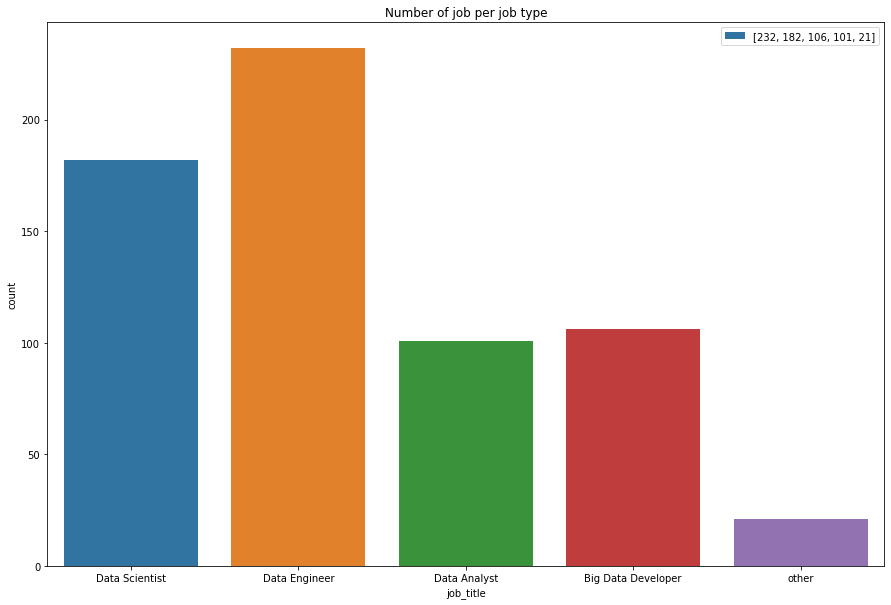

In [37]:
plt.figure(figsize=(15,10))
label = [i for i in all_job_description_data['job_title'].value_counts().to_list()]
ax = sns.countplot(x="job_title",data=all_job_description_data,label=label)
plt.title("Number of job per job type")
plt.legend()
plt.show()

In [38]:
all_job_description_data['job_title'].value_counts()

Data Engineer         232
Data Scientist        182
Big Data Developer    106
Data Analyst          101
other                  21
Name: job_title, dtype: int64

We can see that our data are balance and it will pervert our model. So we'll add data to solve this problem. We'll add:

    * Big Data Developer   
    * Data Analyst  
    * Data Engineer 
    * other(mix of other types of job) 

## Preprocessing of additionnal job description data from kaggle to suppress the imbalanced classes on our initial data
https://github.com/RemeAjayi/ds-job-detective/blob/main/glassdoor_jobs.csv

In [39]:
new_glassdoor = pd.read_csv("data/glassdoor_jobs.csv")
new_glassdoor.head()

,Unnamed: 0,Job Title,Job Description,Company Name,Location
0,0,Data Scientist (Remote),As a critical member of the Stream Systems’ te...,Cadre\n5.0,Calgary
1,1,Data Scientist (Remote),As a critical member of the Stream Systems’ te...,Cadre\n5.0,Calgary
2,2,Sr. Data Analyst,Numerator is a data and tech company bringing ...,Numerator\n4.1,Remote
3,3,Radar E/W Scientists,"RadarE/W Scientists, Ottawa Canada\n\nRemote w...",Leonardo Canada - Electronics (TTI - Tactical ...,Ottawa
4,4,Radar E/W Scientists,"RadarE/W Scientists, Ottawa Canada\n\nRemote w...",Leonardo Canada - Electronics (TTI - Tactical ...,Ottawa


In [40]:
new_glassdoor = new_glassdoor[['Job Title','Job Description']]
new_glassdoor.rename(columns={"Job Title":"job_title","Job Description":"Content"},inplace=True)
new_glassdoor['source'] = 'Kaggle'
new_glassdoor['label'] = 'job_description'


In [41]:
new_glassdoor['job_title'].value_counts()[:10]

Data Engineer                                                                 133
Data Scientist                                                                 85
Senior Data Scientist                                                          37
Senior Data Engineer                                                           11
Big Data Engineer                                                               9
Cloud Data Engineer                                                             9
Data Science Instructor                                                         6
Lead Data Scientist                                                             6
Data Engineer, Analytics and Business Planning - Canadian Business Banking      6
Intermediate Data Engineer                                                      5
Name: job_title, dtype: int64

* add 50 Data Scientist job to have as much as Data Engineer job job: 85

In [42]:
add_data_scientist = new_glassdoor[new_glassdoor['job_title']=="Data Scientist"]
print(add_data_scientist.shape)
add_data_scientist.head()

(85, 4)


,job_title,Content,source,label
23,Data Scientist,"Reporting to the Technical Manager, Digital Pr...",Kaggle,job_description
24,Data Scientist,Spare is looking for a Data Scientist to join ...,Kaggle,job_description
27,Data Scientist,Our research team’s core mission is protecting...,Kaggle,job_description
28,Data Scientist,Our research team’s core mission is protecting...,Kaggle,job_description
30,Data Scientist,"At Canada Drives, we believe the experience of...",Kaggle,job_description


In [43]:
all_job_description_data = all_job_description_data.append(add_data_scientist,ignore_index=True)

In [44]:
all_job_description_data['job_title'].value_counts()

Data Scientist        267
Data Engineer         232
Big Data Developer    106
Data Analyst          101
other                  21
Name: job_title, dtype: int64

In [45]:
all_job_description_data[all_job_description_data.duplicated()]

,Content,source,job_title,label
645,Our research team’s core mission is protecting...,Kaggle,Data Scientist,job_description
650,Job Description\n\n\nOur Precima team helps re...,Kaggle,Data Scientist,job_description
652,Our world relies on AI more and more each day....,Kaggle,Data Scientist,job_description
654,Type: Full-Time\nPrimary Location: Canada\nEdu...,Kaggle,Data Scientist,job_description
667,OPENTEXT - THE INFORMATION COMPANY\n\nAs the I...,Kaggle,Data Scientist,job_description
668,Bachelor's Degree\n3+ years of experience with...,Kaggle,Data Scientist,job_description
672,Ready to create innovative solutions and best ...,Kaggle,Data Scientist,job_description
674,The CTC Personalization & Customer Analytics t...,Kaggle,Data Scientist,job_description
677,Data Scientist\n\nSequence Bio is a dedicated ...,Kaggle,Data Scientist,job_description
682,The Company You’ll Join\n\nAt Carta we create ...,Kaggle,Data Scientist,job_description


In [46]:
all_job_description_data.drop_duplicates(inplace=True)

In [47]:
all_job_description_data['job_title'].value_counts()

Data Scientist        248
Data Engineer         232
Big Data Developer    106
Data Analyst          101
other                  21
Name: job_title, dtype: int64

## New Kaggle data
https://www.kaggle.com/code/chadalee/text-analytics-explained-job-description-data/data

In [48]:
df = pd.read_csv('data/Train_rev1.csv')
df.head()


,Id,Title,FullDescription,LocationRaw,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryRaw,SalaryNormalized,SourceName
0,12612628,Engineering Systems Analyst,Engineering Systems Analyst Dorking Surrey Sal...,"Dorking, Surrey, Surrey",Dorking,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,25000,cv-library.co.uk
1,12612830,Stress Engineer Glasgow,Stress Engineer Glasgow Salary **** to **** We...,"Glasgow, Scotland, Scotland",Glasgow,NaN,permanent,Gregory Martin International,Engineering Jobs,25000 - 35000/annum 25-35K,30000,cv-library.co.uk
2,12612844,Modelling and simulation analyst,Mathematical Modeller / Simulation Analyst / O...,"Hampshire, South East, South East",Hampshire,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 40000/annum 20-40K,30000,cv-library.co.uk
3,12613049,Engineering Systems Analyst / Mathematical Mod...,Engineering Systems Analyst / Mathematical Mod...,"Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,25000 - 30000/annum 25K-30K negotiable,27500,cv-library.co.uk
4,12613647,"Pioneer, Miser Engineering Systems Analyst","Pioneer, Miser Engineering Systems Analyst Do...","Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,25000,cv-library.co.uk


In [49]:
df.isnull().sum()

Id                         0
Title                      1
FullDescription            0
LocationRaw                0
LocationNormalized         0
ContractType          179326
ContractTime           63905
Company                32430
Category                   0
SalaryRaw                  0
SalaryNormalized           0
SourceName                 1
dtype: int64

In [50]:
df = df[['Title','FullDescription']]
df.rename(columns={"Title":"job_title","FullDescription":"Content"},inplace=True)
df['source'] = 'Kaggle'
df['label'] = 'job_description'
df.head()

,job_title,Content,source,label
0,Engineering Systems Analyst,Engineering Systems Analyst Dorking Surrey Sal...,Kaggle,job_description
1,Stress Engineer Glasgow,Stress Engineer Glasgow Salary **** to **** We...,Kaggle,job_description
2,Modelling and simulation analyst,Mathematical Modeller / Simulation Analyst / O...,Kaggle,job_description
3,Engineering Systems Analyst / Mathematical Mod...,Engineering Systems Analyst / Mathematical Mod...,Kaggle,job_description
4,"Pioneer, Miser Engineering Systems Analyst","Pioneer, Miser Engineering Systems Analyst Do...",Kaggle,job_description


In [51]:
df.dropna(inplace=True)

In [52]:
df.drop_duplicates(inplace=True)

In [53]:
 df['job_title'].value_counts() [:15]

Business Development Manager    916
Project Manager                 747
Management Accountant           658
Sales Executive                 602
Account Manager                 538
Finance Manager                 456
Mechanical Design Engineer      455
Credit Controller               438
Cleaner                         435
Accounts Assistant              434
Administrator                   428
Recruitment Consultant          423
Assistant Manager               392
Financial Controller            387
Sales Manager                   356
Name: job_title, dtype: int64

* Other(mix of several types of job) 

We need 232 raw data of job descritpion with jo title = Other, I'll create a function to take a mix of 232-21= 211 data among the 15 most represented JOB of df

In [54]:
def new_job_data(df):
    new_job_title = df['job_title'].value_counts() [:15].index
    new_job_title = new_job_title.to_list()
    new_data = pd.DataFrame()
    for i in range (len(new_job_title)):
        new_job = df[df["job_title"]==new_job_title[i]][:14] # to have 14*15 = 210
        new_data = new_data.append(new_job,ignore_index=True)
    new_data["job_title"] = "other"
    print(new_data.shape)
    return(new_data)


In [55]:
mix_job = new_job_data(df)
mix_job.head()


(210, 4)


,job_title,Content,source,label
0,other,"The Company: Our client are a full service, cr...",Kaggle,job_description
1,other,Business Development Manager Hays Facilities M...,Kaggle,job_description
2,other,Business Development Manager to win new busine...,Kaggle,job_description
3,other,This is a work from home opportunity with an a...,Kaggle,job_description
4,other,"Our client, a UK international law firm, is se...",Kaggle,job_description


In [56]:
all_job_description_data = all_job_description_data.append(mix_job,ignore_index=True)
all_job_description_data['job_title'].value_counts()

Data Scientist        248
Data Engineer         232
other                 231
Big Data Developer    106
Data Analyst          101
Name: job_title, dtype: int64

* Big Data Developer job:  19 

In [57]:
add_Big_Data_Developer = df[df.job_title.str.contains(" Developer .* Big Data")]
add_Big_Data_Developer.drop([17377,33578],inplace=True)
add_Big_Data_Developer["job_title"] = "Big Data Developer"
print(add_Big_Data_Developer.shape)
add_Big_Data_Developer.head()

(19, 4)


C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
<ipython-input-57-dd90cce2b0bb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  add_Big_Data_Developer["job_title"] = "Big Data Developer"


,job_title,Content,source,label
38905,Big Data Developer,Java Developer with experience of some of Spri...,Kaggle,job_description
39067,Big Data Developer,Software Developer / Software Engineer (.Net) ...,Kaggle,job_description
64578,Big Data Developer,Software Developer / Software Engineer (.Net) ...,Kaggle,job_description
81850,Big Data Developer,PHP Developer in Big Data / NoSQL environment ...,Kaggle,job_description
112946,Big Data Developer,"Quantitative Developer Core Java, Matlab, AGIL...",Kaggle,job_description


In [58]:
all_job_description_data = all_job_description_data.append(add_Big_Data_Developer,ignore_index=True)
all_job_description_data['job_title'].value_counts()

Data Scientist        248
Data Engineer         232
other                 231
Big Data Developer    125
Data Analyst          101
Name: job_title, dtype: int64

* Data Analyst  job: 20

In [59]:
add_data_analyst = df[df['job_title']=="Data Analyst"]
print(add_data_analyst.shape)
add_data_analyst.head()

(99, 4)


,job_title,Content,source,label
8740,Data Analyst,Data Analyst Data Controls London Permanent U...,Kaggle,job_description
10944,Data Analyst,Global Market Leader Business Analyst / Data A...,Kaggle,job_description
12706,Data Analyst,Data Analyst ****K We have a great opportunity...,Kaggle,job_description
17528,Data Analyst,Data Analyst s to aid strategic decisions and ...,Kaggle,job_description
17621,Data Analyst,London Borough of Croydon Data Analyst Contrac...,Kaggle,job_description


final dataset

In [60]:
final_data = pd.concat([all_job_description_data,add_data_analyst],axis=0)
final_data['job_title'].value_counts()

Data Scientist        248
Data Engineer         232
other                 231
Data Analyst          200
Big Data Developer    125
Name: job_title, dtype: int64

In [61]:
final_data[final_data.duplicated()]

,Content,source,job_title,label


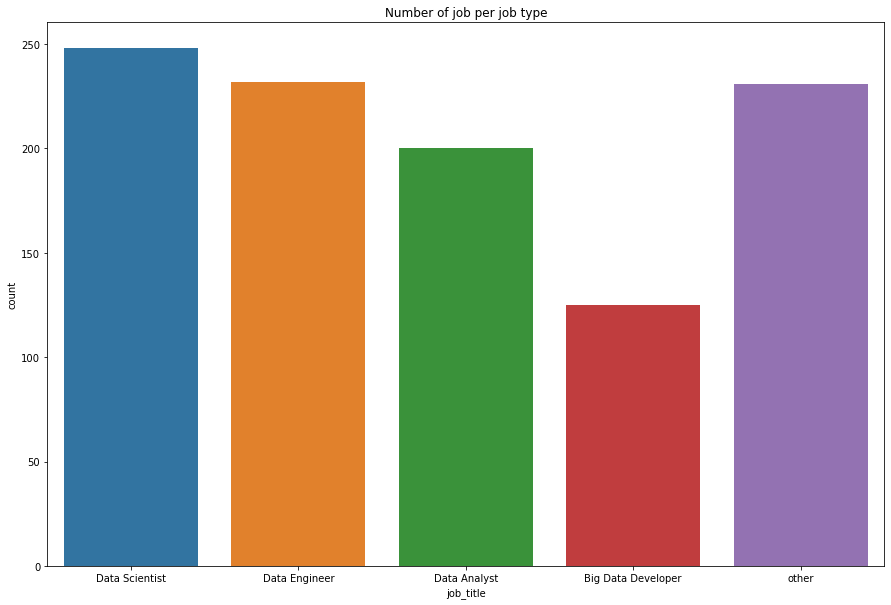

In [62]:
plt.figure(figsize=(15,10))
# label = [i for i in all_job_description_data['job_title'].value_counts().to_list()]
ax = sns.countplot(x="job_title",data=final_data)
plt.title("Number of job per job type")
# plt.legend()
plt.show()

In [63]:
# final_data.to_csv('data/unbalanced.csv',index=False)

## Text reprocessing

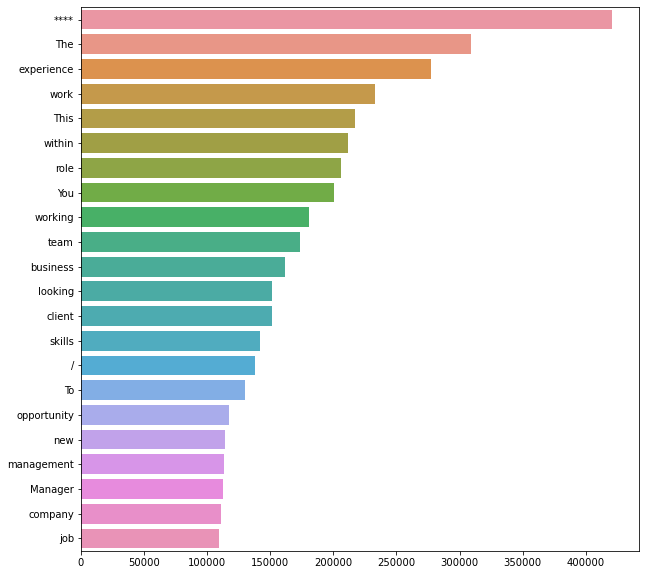

In [83]:
import seaborn as sns
from collections import  Counter

def plot_top_non_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:50]:
        if (word not in stop):
            x.append(word)
            y.append(count)
    plt.figure(figsize=(10,10))
    sns.barplot(x=y,y=x)

plot_top_non_stopwords_barchart(df['Content'])